In [1]:
## To import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## To load the dataset and to display first 5 rows
data=pd.read_csv(r"C:\Users\jinuv\Desktop\Python\Assignment6\titanic_dataset .csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## To know the number of rows and columns
data.shape

(891, 12)

In [4]:
## To get the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
## To know the missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
## To fill missing values in column 'Age'
for i in ['Age']:
    data[i]=data[i].fillna(data[i].median())

In [7]:
## To drop cabin column with more missing values
data=data.drop('Cabin',axis=1)

In [8]:
## To fill missing values in Embarked column
for i in ['Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [9]:
## To check the missing values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
## To display first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
## To take Survived as target and to drop some columns
x=data.drop(['Survived','PassengerId','Name','Ticket'],axis=1)
y=data['Survived']

In [15]:
## To make categorical to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x['Embarked']=le.fit_transform(x['Embarked'])

In [16]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [22]:
## To split data in training and test sets and to apply KNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
## KNN Model
metric_k=[]
neighbors=np.arange(3,15)

In [23]:
## KNN Classifier
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [24]:
## Value of k
metric_k

[0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7318435754189944,
 0.7262569832402235,
 0.7150837988826816,
 0.7262569832402235,
 0.7150837988826816,
 0.7430167597765364,
 0.7150837988826816,
 0.7318435754189944,
 0.7318435754189944]

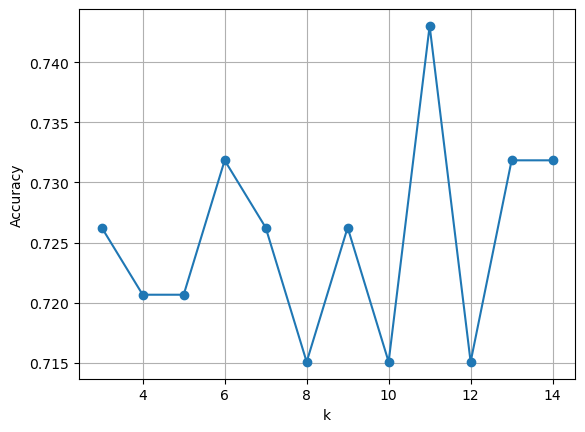

In [25]:
## To plot k and Accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [26]:
## KNN classifier for k=11
classifier=KNeighborsClassifier(n_neighbors=11,metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [27]:
## To print accuracy
print('Accuracy =',accuracy_score(y_test,y_predictions))

Accuracy = 0.7430167597765364


In [28]:
## SVM model
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
## To know SVM prediction
y_pred=svmclf.predict(x_test)

In [30]:
## To print accuracy score in SVM model
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.7821229050279329


In [33]:
## To use logistic regression
from sklearn.linear_model import LogisticRegression
Ir=LogisticRegression()
model=Ir.fit(x_train,y_train)

In [31]:
## To use K fold cross validation
from sklearn.model_selection import KFold
kfold_validator=KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Test Index: ',test_index)

Training Index:  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [34]:
## To know cross validation score in k fold
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(Ir,x,y,cv=kfold_validator)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [35]:
## Result of k fold cross validation
cv_result

array([0.78888889, 0.80898876, 0.7752809 , 0.7752809 , 0.7752809 ,
       0.76404494, 0.76404494, 0.7752809 , 0.84269663, 0.84269663])

In [36]:
## Average score of K fold cross validation
np.mean(cv_result)

0.7912484394506867

In [37]:
## Stratified k fold cross validation method
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [38]:
## to use stratified kfold validation
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index: ',train_index)
    print('Test Index: ',test_index)

Training Index:  [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 3

In [39]:
## Result of Stratified k fold cross validation
cv_result=cross_val_score(Ir,x,y,cv=skfold_validator)
cv_result

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.78888889, 0.79775281, 0.76404494, 0.82022472, 0.78651685,
       0.7752809 , 0.78651685, 0.78651685, 0.80898876, 0.84269663])

In [40]:
## Average score of Stratified K fold cross validation
np.mean(cv_result)

0.7957428214731586